In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.shape

(418, 11)

In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic_train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

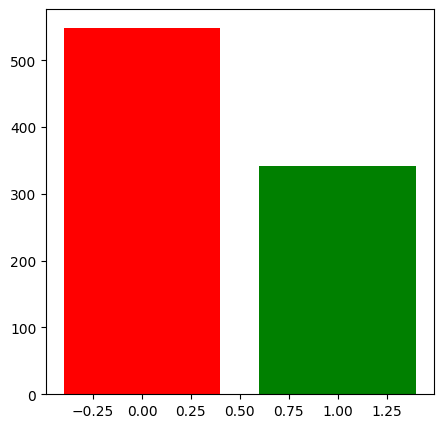

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [9]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

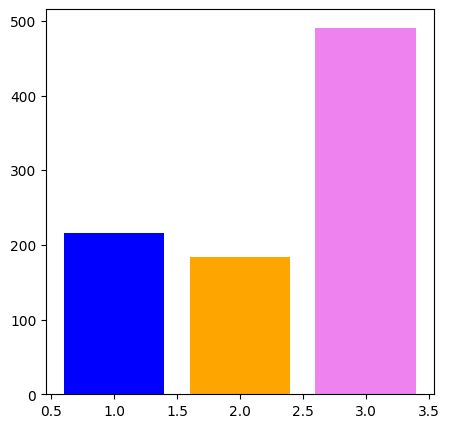

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['violet','blue','Orange'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22332\3363569245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr())


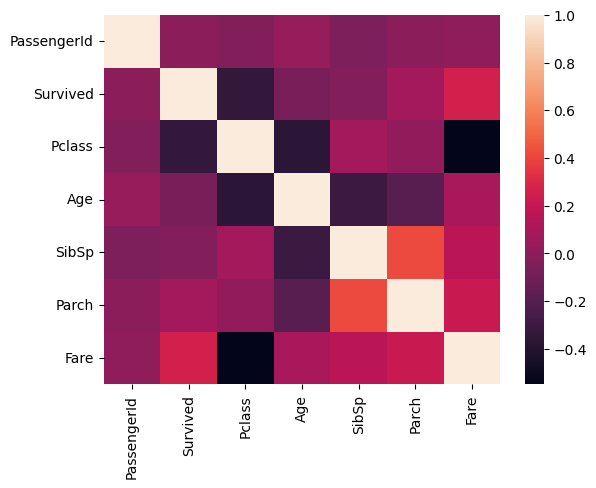

In [11]:
import seaborn as sns
sns.heatmap(titanic_train.corr())
plt.show()

In [12]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

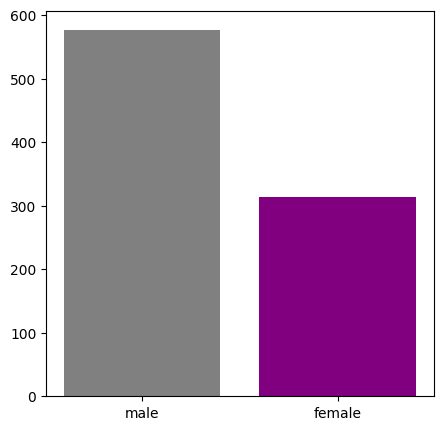

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['grey','purple'])
plt.show()

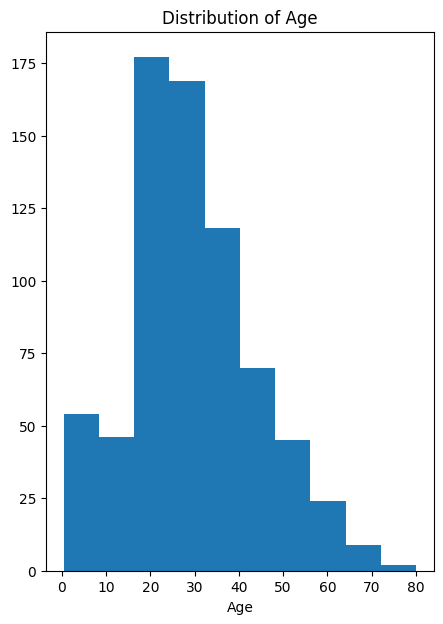

In [14]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [15]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [16]:
sum(titanic_train['Survived'].isnull())

0

In [17]:
titanic_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [18]:
sum(titanic_train['Age'].isnull())

177

In [19]:
titanic_train=titanic_train.dropna()

In [20]:
sum(titanic_train['Survived'].isnull())

0

In [21]:
sum(titanic_train['Age'].isnull())

0

In [22]:
X=titanic_train[['Age']]
y=titanic_train[['Survived']]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf=DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
titanic_test=titanic_test.dropna()

In [28]:
sum(titanic_test['Age'].isnull())

0

In [29]:
X_test=titanic_test[['Age']]

In [30]:
y_pred=clf.predict(X_train)

In [31]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [32]:
y_train

,Survived
331,0
310,1
319,1
659,0
462,0
...,...
741,0
299,1
536,0
742,1


In [33]:
accuracy=accuracy_score(y_train,y_pred)*100

In [34]:
print("Accuracy: ",accuracy)

Accuracy:  82.87671232876713


In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train,y_train)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
pred=model.predict(X_train)

In [38]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
score=accuracy_score(y_train,y_pred)*100

In [41]:
print("Accuracy: ",score)

Accuracy:  82.87671232876713
